# Filter Merged CDAW/LASCO CME Event & Non-event Catalogs
This notebook is for pulling out training datasets from the event and non-event merged CDAW/LASCO catalogs.

In [1]:
import requests
import pandas as pd

LASCO_Catalog_Filename = '../lasco_img_catalog_lvl_1.txt'
CME_Catalog_Filename = '../cme_event_catlog.txt'
Merged_Catalog_Filename = '../cme_events.csv'

C2_non_CME_Catalog_Filename = '../c2_non_events.csv'
C3_non_CME_Catalog_Filename = '../c3_non_events.csv'

# the number of files, sequentially, which we will difference
File_Seq_Size = 6

In [2]:
cme_data = pd.read_csv(Merged_Catalog_Filename)
#cme_data = cme_data.drop('Unnamed: 0', axis=1)
cme_data

/home/thomas/Work/NASA/Code/cdaw_cme_catalog_analysis/venv/lib64/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,filename,date-obs,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,Remarks,Central,Width,Linear,CDAW_Id
0,0,25000294.fts,1996/01/31,C2,1024,1024,Orang,Clear,1996-01-31 08:01:38,25.4,Poor Event; Only 3 points,274,47,158,5
1,1,25000295.fts,1996/01/31,C2,1024,1024,Orang,Clear,1996-01-31 09:11:14,25.0,Poor Event; Only 3 points,274,47,158,5
2,2,25000296.fts,1996/01/31,C2,1024,1024,Orang,Clear,1996-01-31 10:20:39,25.0,Poor Event; Only 3 points,274,47,158,5
3,3,25000297.fts,1996/01/31,C2,1024,1024,Orang,Clear,1996-01-31 11:30:19,25.9,Poor Event; Only 3 points,274,47,158,5
4,4,25000298.fts,1996/01/31,C2,1024,1024,Orang,Clear,1996-01-31 12:40:17,25.1,Poor Event; Only 3 points,274,47,158,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398670,398670,35513585.fts,2017/08/31,C3,1024,1024,Clear,Clear,2017-08-31 23:04:45,17.6,Poor Event,275,54,274,28855
398671,398671,35513586.fts,2017/08/31,C3,1024,1024,Clear,Clear,2017-08-31 23:16:36,17.5,Poor Event,275,54,274,28855
398672,398672,35513587.fts,2017/08/31,C3,1024,1024,Clear,Clear,2017-08-31 23:28:54,17.9,Poor Event,275,54,274,28855
398673,398673,35513588.fts,2017/08/31,C3,1024,1024,Clear,Clear,2017-08-31 23:40:50,17.6,Poor Event,275,54,274,28855


In [3]:
# function to get unique values 
def unique(list1): 
      
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set)) 
    return unique_list
      

In [4]:
# test it out, try to pull a few intervals for events
C2_data = cme_data[cme_data['telescope']=='C2']
C2_data

,Unnamed: 0,filename,date-obs,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,Remarks,Central,Width,Linear,CDAW_Id
0,0,25000294.fts,1996/01/31,C2,1024,1024,Orang,Clear,1996-01-31 08:01:38,25.4,Poor Event; Only 3 points,274,47,158,5
1,1,25000295.fts,1996/01/31,C2,1024,1024,Orang,Clear,1996-01-31 09:11:14,25.0,Poor Event; Only 3 points,274,47,158,5
2,2,25000296.fts,1996/01/31,C2,1024,1024,Orang,Clear,1996-01-31 10:20:39,25.0,Poor Event; Only 3 points,274,47,158,5
3,3,25000297.fts,1996/01/31,C2,1024,1024,Orang,Clear,1996-01-31 11:30:19,25.9,Poor Event; Only 3 points,274,47,158,5
4,4,25000298.fts,1996/01/31,C2,1024,1024,Orang,Clear,1996-01-31 12:40:17,25.1,Poor Event; Only 3 points,274,47,158,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398635,398635,25649074.fts,2017/08/31,C2,1024,1024,Orang,Clear,2017-08-31 18:11:10,25.1,Poor Event,275,54,274,28855
398636,398636,25649075.fts,2017/08/31,C2,1024,1024,Orang,Clear,2017-08-31 18:23:08,25.3,Poor Event,275,54,274,28855
398637,398637,25649076.fts,2017/08/31,C2,1024,1024,Orang,Clear,2017-08-31 18:35:08,25.1,Poor Event,275,54,274,28855
398638,398638,25649077.fts,2017/08/31,C2,1024,1024,Orang,Clear,2017-08-31 18:47:07,25.1,Poor Event,275,54,274,28855


In [5]:
# remove events which have poor data OR are different type ("Halo")
slice1 = C2_data
#for filter in ['Only 3 points', 'Only 2 points', 'Poor Event', 'data gap', 'Partial Halo', 'Halo', 'Not LE']:
for filter in ['Very Poor Event', 'Only 2 points', 'Only 3 points', 'data gap', 'Partial Halo', 'Halo', 'Not LE']:
    slice1 = slice1[~slice1['Remarks'].str.contains(filter, regex=True)]
slice1

,Unnamed: 0,filename,date-obs,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,Remarks,Central,Width,Linear,CDAW_Id
25,25,25000487.fts,1996/02/12,C2,1024,1024,Orang,Clear,1996-02-12 07:01:57,25.1,Poor Event,91,53,160,8
26,26,25000488.fts,1996/02/12,C2,1024,1024,Orang,Clear,1996-02-12 08:16:27,25.0,Poor Event,91,53,160,8
27,27,25000489.fts,1996/02/12,C2,1024,1024,Orang,Clear,1996-02-12 09:30:48,25.1,Poor Event,91,53,160,8
28,28,25000490.fts,1996/02/12,C2,1024,1024,Orang,Clear,1996-02-12 10:45:46,25.1,Poor Event,91,53,160,8
29,29,25000491.fts,1996/02/12,C2,1024,1024,Orang,Clear,1996-02-12 12:00:22,13.8,Poor Event,91,53,160,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398635,398635,25649074.fts,2017/08/31,C2,1024,1024,Orang,Clear,2017-08-31 18:11:10,25.1,Poor Event,275,54,274,28855
398636,398636,25649075.fts,2017/08/31,C2,1024,1024,Orang,Clear,2017-08-31 18:23:08,25.3,Poor Event,275,54,274,28855
398637,398637,25649076.fts,2017/08/31,C2,1024,1024,Orang,Clear,2017-08-31 18:35:08,25.1,Poor Event,275,54,274,28855
398638,398638,25649077.fts,2017/08/31,C2,1024,1024,Orang,Clear,2017-08-31 18:47:07,25.1,Poor Event,275,54,274,28855


In [6]:
slice1.sort_values('Linear', ascending=True)[:1]

,Unnamed: 0,filename,date-obs,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,Remarks,Central,Width,Linear,CDAW_Id
87992,87992,25249259.fts,2007/03/16,C2,1024,1024,Orang,Clear,2007-03-16 04:25:43,26.1,Poor Event,64,29,38,11950


In [7]:
slice1.sort_values('Linear', ascending=False)[:1]

,Unnamed: 0,filename,date-obs,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,Remarks,Central,Width,Linear,CDAW_Id
68519,68519,25187907.fts,2005/01/17,C2,1024,1024,Orang,Clear,2005-01-17 10:04:48,24.6,Newly inserted on 2005/12/06,Halo,360,2547,9473


In [8]:
ids = list(slice1['CDAW_Id'])
foo = unique(ids)
len(foo)

5302

In [9]:
#slice1['CDAW_Id'][:20]

In [10]:
#cme_event = slice1[slice1['CDAW_Id']==428]
#cme_event

In [11]:
#list(cme_event['filename']) #.to_string()

In [12]:
# how many files if we isolate 1024x1024 images
slice2 = slice1
slice2 = slice2[slice2['NumCols']==1024]
slice2 = slice2[slice2['NumRows']==1024]
slice2

,Unnamed: 0,filename,date-obs,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,Remarks,Central,Width,Linear,CDAW_Id
25,25,25000487.fts,1996/02/12,C2,1024,1024,Orang,Clear,1996-02-12 07:01:57,25.1,Poor Event,91,53,160,8
26,26,25000488.fts,1996/02/12,C2,1024,1024,Orang,Clear,1996-02-12 08:16:27,25.0,Poor Event,91,53,160,8
27,27,25000489.fts,1996/02/12,C2,1024,1024,Orang,Clear,1996-02-12 09:30:48,25.1,Poor Event,91,53,160,8
28,28,25000490.fts,1996/02/12,C2,1024,1024,Orang,Clear,1996-02-12 10:45:46,25.1,Poor Event,91,53,160,8
29,29,25000491.fts,1996/02/12,C2,1024,1024,Orang,Clear,1996-02-12 12:00:22,13.8,Poor Event,91,53,160,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398635,398635,25649074.fts,2017/08/31,C2,1024,1024,Orang,Clear,2017-08-31 18:11:10,25.1,Poor Event,275,54,274,28855
398636,398636,25649075.fts,2017/08/31,C2,1024,1024,Orang,Clear,2017-08-31 18:23:08,25.3,Poor Event,275,54,274,28855
398637,398637,25649076.fts,2017/08/31,C2,1024,1024,Orang,Clear,2017-08-31 18:35:08,25.1,Poor Event,275,54,274,28855
398638,398638,25649077.fts,2017/08/31,C2,1024,1024,Orang,Clear,2017-08-31 18:47:07,25.1,Poor Event,275,54,274,28855


In [13]:
ids = list(slice2['CDAW_Id'])
len(unique(ids))

5286

In [14]:
filts = list(slice2['Filter'])
print(unique(filts))

['Orang']


In [15]:
#  Isolate events where we have 'campaign mode' (e.g. strange image sizes)
slice3 = slice1
slice3 = slice3[slice3['NumCols']!=1024]
slice3 = slice3[slice3['NumRows']!=1024]
campaign_ids = unique(list(slice3['CDAW_Id']))
print (len(campaign_ids))
#sorted(campaign_ids)

120


In [16]:
# cleaned list of general CMEs is now (campaign mode subtracted out)
cleaned = slice2[~slice2['CDAW_Id'].isin(campaign_ids)]
cleaned

,Unnamed: 0,filename,date-obs,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,Remarks,Central,Width,Linear,CDAW_Id
25,25,25000487.fts,1996/02/12,C2,1024,1024,Orang,Clear,1996-02-12 07:01:57,25.1,Poor Event,91,53,160,8
26,26,25000488.fts,1996/02/12,C2,1024,1024,Orang,Clear,1996-02-12 08:16:27,25.0,Poor Event,91,53,160,8
27,27,25000489.fts,1996/02/12,C2,1024,1024,Orang,Clear,1996-02-12 09:30:48,25.1,Poor Event,91,53,160,8
28,28,25000490.fts,1996/02/12,C2,1024,1024,Orang,Clear,1996-02-12 10:45:46,25.1,Poor Event,91,53,160,8
29,29,25000491.fts,1996/02/12,C2,1024,1024,Orang,Clear,1996-02-12 12:00:22,13.8,Poor Event,91,53,160,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398635,398635,25649074.fts,2017/08/31,C2,1024,1024,Orang,Clear,2017-08-31 18:11:10,25.1,Poor Event,275,54,274,28855
398636,398636,25649075.fts,2017/08/31,C2,1024,1024,Orang,Clear,2017-08-31 18:23:08,25.3,Poor Event,275,54,274,28855
398637,398637,25649076.fts,2017/08/31,C2,1024,1024,Orang,Clear,2017-08-31 18:35:08,25.1,Poor Event,275,54,274,28855
398638,398638,25649077.fts,2017/08/31,C2,1024,1024,Orang,Clear,2017-08-31 18:47:07,25.1,Poor Event,275,54,274,28855


In [17]:
ids = unique(list(cleaned['CDAW_Id']))
len(ids)

5169

In [18]:
# Remove events where they have only one file associated with it
result = cleaned.groupby('CDAW_Id', sort=False).count()
#result[result['CDAW_Id']=='8']
result['filename']


CDAW_Id
8         5
12        9
16        3
37        2
38        4
         ..
28841    33
28842    28
28848    28
28853    24
28855    20
Name: filename, Length: 5169, dtype: int64

Text(0, 0.5, 'Frequency')

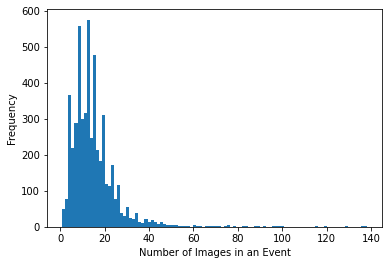

In [19]:
# plot number distribution of events
import matplotlib.pyplot as plt
result['filename'].plot.hist(bins=100)
plt.xlabel("Number of Images in an Event")
plt.ylabel("Frequency")
#plt.set(xlabel="foo")

Text(0, 0.5, 'Frequency')

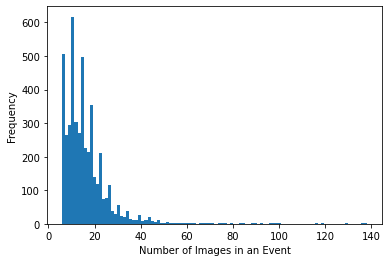

In [20]:
# find the number of events where we have File_Seq_Size or more files (images)
# we will train on first 5 differenced images
events_with_sufficent_images = result[result['filename']>=File_Seq_Size]
events_with_sufficent_images ['filename'].plot.hist(bins=100)
plt.xlabel("Number of Images in an Event")
plt.ylabel("Frequency")

#events_with_sufficent_images

In [21]:
#filter for the events with sufficent images now
esi_ids = list(events_with_sufficent_images.index)

cleaned2 = cleaned[cleaned['CDAW_Id'].isin(esi_ids)]
cleaned2

#esi_ids

,Unnamed: 0,filename,date-obs,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,Remarks,Central,Width,Linear,CDAW_Id
50,50,25000681.fts,1996/03/02,C2,1024,1024,Orang,Clear,1996-03-02 04:32:25,25.1,Poor Event,88,36,108,12
51,51,25000682.fts,1996/03/02,C2,1024,1024,Orang,Clear,1996-03-02 05:28:23,25.1,Poor Event,88,36,108,12
52,52,25000683.fts,1996/03/02,C2,1024,1024,Orang,Clear,1996-03-02 06:31:53,25.8,Poor Event,88,36,108,12
53,53,25000684.fts,1996/03/02,C2,1024,1024,Orang,Clear,1996-03-02 07:35:53,25.1,Poor Event,88,36,108,12
54,54,25000685.fts,1996/03/02,C2,1024,1024,Orang,Clear,1996-03-02 08:39:53,25.1,Poor Event,88,36,108,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398635,398635,25649074.fts,2017/08/31,C2,1024,1024,Orang,Clear,2017-08-31 18:11:10,25.1,Poor Event,275,54,274,28855
398636,398636,25649075.fts,2017/08/31,C2,1024,1024,Orang,Clear,2017-08-31 18:23:08,25.3,Poor Event,275,54,274,28855
398637,398637,25649076.fts,2017/08/31,C2,1024,1024,Orang,Clear,2017-08-31 18:35:08,25.1,Poor Event,275,54,274,28855
398638,398638,25649077.fts,2017/08/31,C2,1024,1024,Orang,Clear,2017-08-31 18:47:07,25.1,Poor Event,275,54,274,28855


<AxesSubplot:ylabel='Frequency'>

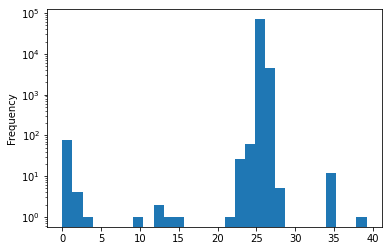

In [22]:
# examine exposure times
cleaned2['expTime'].plot.hist(logy=True, bins=30)

In [23]:
# get rid of exposure times which are not nominal (e.g. 25.1)
lower_exptime = 24.75
upper_exptime = 27.5

slice4 = cleaned2
slice4 = slice4[slice4['expTime']>= upper_exptime]

slice5 = cleaned2
slice5 = slice5[slice5['expTime']<= lower_exptime]

poor_exposure_ids = list(slice4['CDAW_Id'])
poor_exposure_ids.extend(list(slice5['CDAW_Id']))
poor_exposure_ids = unique (poor_exposure_ids)
len(poor_exposure_ids)

53

In [24]:
cleaned3 = cleaned2[~cleaned2['CDAW_Id'].isin(poor_exposure_ids)]
cleaned3

,Unnamed: 0,filename,date-obs,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,Remarks,Central,Width,Linear,CDAW_Id
50,50,25000681.fts,1996/03/02,C2,1024,1024,Orang,Clear,1996-03-02 04:32:25,25.1,Poor Event,88,36,108,12
51,51,25000682.fts,1996/03/02,C2,1024,1024,Orang,Clear,1996-03-02 05:28:23,25.1,Poor Event,88,36,108,12
52,52,25000683.fts,1996/03/02,C2,1024,1024,Orang,Clear,1996-03-02 06:31:53,25.8,Poor Event,88,36,108,12
53,53,25000684.fts,1996/03/02,C2,1024,1024,Orang,Clear,1996-03-02 07:35:53,25.1,Poor Event,88,36,108,12
54,54,25000685.fts,1996/03/02,C2,1024,1024,Orang,Clear,1996-03-02 08:39:53,25.1,Poor Event,88,36,108,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398635,398635,25649074.fts,2017/08/31,C2,1024,1024,Orang,Clear,2017-08-31 18:11:10,25.1,Poor Event,275,54,274,28855
398636,398636,25649075.fts,2017/08/31,C2,1024,1024,Orang,Clear,2017-08-31 18:23:08,25.3,Poor Event,275,54,274,28855
398637,398637,25649076.fts,2017/08/31,C2,1024,1024,Orang,Clear,2017-08-31 18:35:08,25.1,Poor Event,275,54,274,28855
398638,398638,25649077.fts,2017/08/31,C2,1024,1024,Orang,Clear,2017-08-31 18:47:07,25.1,Poor Event,275,54,274,28855


In [25]:
# filter polarizer, Filter to be consistent
C2_Filter = 'Orang'
C2_Polarizer = 'Clear'
cleaned3 = cleaned3[cleaned3['Filter']==C2_Filter]
cleaned3 = cleaned3[cleaned3['Polarizer']==C2_Polarizer]
cleaned3

,Unnamed: 0,filename,date-obs,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,Remarks,Central,Width,Linear,CDAW_Id
50,50,25000681.fts,1996/03/02,C2,1024,1024,Orang,Clear,1996-03-02 04:32:25,25.1,Poor Event,88,36,108,12
51,51,25000682.fts,1996/03/02,C2,1024,1024,Orang,Clear,1996-03-02 05:28:23,25.1,Poor Event,88,36,108,12
52,52,25000683.fts,1996/03/02,C2,1024,1024,Orang,Clear,1996-03-02 06:31:53,25.8,Poor Event,88,36,108,12
53,53,25000684.fts,1996/03/02,C2,1024,1024,Orang,Clear,1996-03-02 07:35:53,25.1,Poor Event,88,36,108,12
54,54,25000685.fts,1996/03/02,C2,1024,1024,Orang,Clear,1996-03-02 08:39:53,25.1,Poor Event,88,36,108,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398635,398635,25649074.fts,2017/08/31,C2,1024,1024,Orang,Clear,2017-08-31 18:11:10,25.1,Poor Event,275,54,274,28855
398636,398636,25649075.fts,2017/08/31,C2,1024,1024,Orang,Clear,2017-08-31 18:23:08,25.3,Poor Event,275,54,274,28855
398637,398637,25649076.fts,2017/08/31,C2,1024,1024,Orang,Clear,2017-08-31 18:35:08,25.1,Poor Event,275,54,274,28855
398638,398638,25649077.fts,2017/08/31,C2,1024,1024,Orang,Clear,2017-08-31 18:47:07,25.1,Poor Event,275,54,274,28855


In [50]:
# now step through each CME event and keep only the first images
# as indicated by File_Seq_Size

cme_events = list(unique(cleaned3['CDAW_Id']))
filtered_data = {col:[] for col in cleaned3.columns}

for cme_event in cme_events:
    cme_data = cleaned3[cleaned3['CDAW_Id'] == cme_event]
    
    for row in cme_data[:File_Seq_Size].iterrows():
        for col in cleaned3.columns:
            filtered_data[col].append(row[1][col])
            
filtered_data = pd.DataFrame(filtered_data)
filtered_data

,Unnamed: 0,filename,date-obs,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,Remarks,Central,Width,Linear,CDAW_Id
0,279481,25526148.fts,2014/11/18,C2,1024,1024,Orang,Clear,2014-11-18 03:11:18,25.1,Poor Event,286,52,286,24577
1,279482,25526149.fts,2014/11/18,C2,1024,1024,Orang,Clear,2014-11-18 03:23:15,25.2,Poor Event,286,52,286,24577
2,279483,25526150.fts,2014/11/18,C2,1024,1024,Orang,Clear,2014-11-18 03:35:15,25.1,Poor Event,286,52,286,24577
3,279484,25526151.fts,2014/11/18,C2,1024,1024,Orang,Clear,2014-11-18 03:47:15,25.0,Poor Event,286,52,286,24577
4,279485,25526152.fts,2014/11/18,C2,1024,1024,Orang,Clear,2014-11-18 03:59:16,25.2,Poor Event,286,52,286,24577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27739,113736,25369681.fts,2011/04/23,C2,1024,1024,Orang,Clear,2011-04-23 18:47:06,25.1,Poor Event,282,22,171,16381
27740,113737,25369682.fts,2011/04/23,C2,1024,1024,Orang,Clear,2011-04-23 18:59:05,25.1,Poor Event,282,22,171,16381
27741,113738,25369683.fts,2011/04/23,C2,1024,1024,Orang,Clear,2011-04-23 19:11:05,25.1,Poor Event,282,22,171,16381
27742,113739,25369684.fts,2011/04/23,C2,1024,1024,Orang,Clear,2011-04-23 19:23:04,25.1,Poor Event,282,22,171,16381


<AxesSubplot:ylabel='Frequency'>

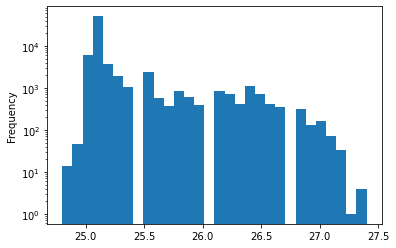

In [52]:
# examine exposure times
cleaned3['expTime'].plot.hist(logy=True, bins=30)

<AxesSubplot:ylabel='Frequency'>

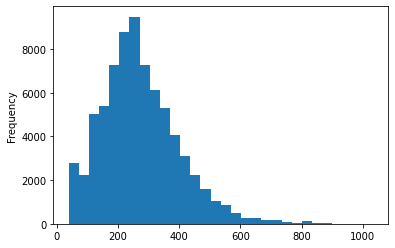

In [53]:
cleaned3['Linear'].plot.hist(bins=30)

<AxesSubplot:ylabel='Frequency'>

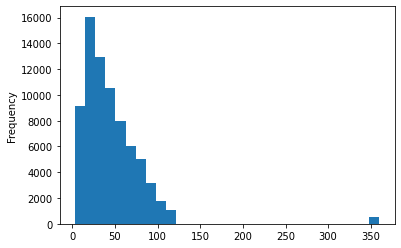

In [54]:
cleaned3['Width'].plot.hist(bins=30)

In [55]:
#write out list of dataset (postitive training)

training = filtered_data[['CDAW_Id','telescope', 'datetime','filename']]
training.to_csv("../C2_positive_training_dataset.csv", index=None)
len(training)

27744

## Now build out a negative training dataset for both C2 and C3

In [30]:
# load non-event merged catalogs
c2_non_events = pd.read_csv(C2_non_CME_Catalog_Filename)
c3_non_events = pd.read_csv(C3_non_CME_Catalog_Filename)
c2_non_events

,filename,datetime,date-obs,telescope,NumCols,NumRows,Filter,Polarizer,expTime
0,25000300.fts,1996-01-31 18:48:55,1996/01/31,C2,512,512,Orang,Clear,6.4
1,25000301.fts,1996-02-01 00:43:07,1996/02/01,C2,1024,1024,Orang,Clear,25.0
2,25000302.fts,1996-02-01 01:07:04,1996/02/01,C2,1024,1024,Orang,Clear,25.1
3,25000303.fts,1996-02-01 02:21:56,1996/02/01,C2,1024,1024,Orang,Clear,25.4
4,25000304.fts,1996-02-01 03:36:53,1996/02/01,C2,1024,1024,Orang,Clear,25.1
...,...,...,...,...,...,...,...,...,...
470095,25649100.fts,2017-08-31 22:34:39,2017/08/31,C2,1024,1024,Orang,Clear,25.1
470096,25649101.fts,2017-08-31 23:10:42,2017/08/31,C2,1024,1024,Orang,Clear,25.1
470097,25649102.fts,2017-08-31 23:22:37,2017/08/31,C2,1024,1024,Orang,Clear,25.5
470098,25649103.fts,2017-08-31 23:34:50,2017/08/31,C2,1024,1024,Orang,Clear,25.1


In [31]:
filts = list(c2_non_events['Filter'])
print(unique(filts))

['Orang', 'DeepR', 'Blue']


In [33]:
# apply the same filter/constraints as for CME event data 
def filter_data(data:pd.DataFrame, filtername:str, polarizer:str)->pd.DataFrame:

    slice1 = data
    
    # only 1024x1024
    slice1 = slice1[slice1['NumRows']==1024]
    slice1 = slice1[slice1['NumCols']==1024]
    
    # only right exptimes
    slice1 = slice1[slice1['expTime'] <= upper_exptime]
    slice1 = slice1[slice1['expTime'] >= lower_exptime]
    
    slice1 = slice1[slice1['Filter']==filtername]
    slice1 = slice1 [slice1['Polarizer']==polarizer]
    
    # TODO?: filter by time window (start year, stop year)
    # where we drew CME events from (to better match non-CME
    # activity of sun in same period)
    
    return slice1

c2_ne = filter_data(c2_non_events, C2_Filter, C2_Polarizer)
c2_ne

,filename,datetime,date-obs,telescope,NumCols,NumRows,Filter,Polarizer,expTime
1,25000301.fts,1996-02-01 00:43:07,1996/02/01,C2,1024,1024,Orang,Clear,25.0
2,25000302.fts,1996-02-01 01:07:04,1996/02/01,C2,1024,1024,Orang,Clear,25.1
3,25000303.fts,1996-02-01 02:21:56,1996/02/01,C2,1024,1024,Orang,Clear,25.4
4,25000304.fts,1996-02-01 03:36:53,1996/02/01,C2,1024,1024,Orang,Clear,25.1
5,25000305.fts,1996-02-01 04:51:44,1996/02/01,C2,1024,1024,Orang,Clear,25.1
...,...,...,...,...,...,...,...,...,...
470095,25649100.fts,2017-08-31 22:34:39,2017/08/31,C2,1024,1024,Orang,Clear,25.1
470096,25649101.fts,2017-08-31 23:10:42,2017/08/31,C2,1024,1024,Orang,Clear,25.1
470097,25649102.fts,2017-08-31 23:22:37,2017/08/31,C2,1024,1024,Orang,Clear,25.5
470098,25649103.fts,2017-08-31 23:34:50,2017/08/31,C2,1024,1024,Orang,Clear,25.1


<AxesSubplot:ylabel='Frequency'>

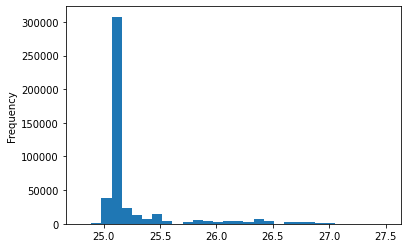

In [34]:
c2_ne['expTime'].plot.hist(bins=30)

In [44]:
import random
# randomly sample out X dates which have 6 or more observations
# X = number of CME events for which we have 6 or more observations
num_cme_events = len(unique(list(cleaned3['CDAW_Id'])))

date_list = unique(list(c2_ne['date-obs']))

random_data = { col:[] for col in c2_ne.columns }

found_obs = 0
# use random sample to pick random dates to get non event data from. We
# multiply cme event number by small factor to allow for possible short intervals we cannot use
for date in random.sample(date_list, int(num_cme_events * 1.1)): 
    if found_obs >= num_cme_events:
        # end when we match number of cme events
        break
        
    # pull data for this date
    date_data = c2_ne[c2_ne['date-obs'] == date]
    
    # check if its got File_Seq_Size or more files available
    if len(date_data) >= File_Seq_Size:
        # it has sufficent, so cache it
        for row in date_data[:File_Seq_Size].iterrows():
            for col in c2_ne.columns:
                random_data[col].append(row[1][col])
                
        found_obs += 1


non_event_random_data = pd.DataFrame(random_data)
non_event_random_data

,filename,datetime,date-obs,telescope,NumCols,NumRows,Filter,Polarizer,expTime
0,25616220.fts,2016-12-03 00:11:29,2016/12/03,C2,1024,1024,Orang,Clear,25.1
1,25616221.fts,2016-12-03 00:23:38,2016/12/03,C2,1024,1024,Orang,Clear,25.1
2,25616222.fts,2016-12-03 00:35:31,2016/12/03,C2,1024,1024,Orang,Clear,26.4
3,25616223.fts,2016-12-03 00:47:42,2016/12/03,C2,1024,1024,Orang,Clear,25.1
4,25616224.fts,2016-12-03 01:25:10,2016/12/03,C2,1024,1024,Orang,Clear,25.1
...,...,...,...,...,...,...,...,...,...
27739,25213911.fts,2005-12-09 00:23:41,2005/12/09,C2,1024,1024,Orang,Clear,25.1
27740,25213912.fts,2005-12-09 00:35:42,2005/12/09,C2,1024,1024,Orang,Clear,25.1
27741,25213913.fts,2005-12-09 00:47:40,2005/12/09,C2,1024,1024,Orang,Clear,25.2
27742,25213914.fts,2005-12-09 00:59:40,2005/12/09,C2,1024,1024,Orang,Clear,26.2


In [46]:
# include date-obs in this dataset so we can use it downstream as a type of non event 'id'
training = non_event_random_data[['datetime', 'date-obs', 'telescope', 'filename']]
training.to_csv("../C2_negative_training_dataset.csv", index=None)

In [47]:
training

,datetime,date-obs,telescope,filename
0,2016-12-03 00:11:29,2016/12/03,C2,25616220.fts
1,2016-12-03 00:23:38,2016/12/03,C2,25616221.fts
2,2016-12-03 00:35:31,2016/12/03,C2,25616222.fts
3,2016-12-03 00:47:42,2016/12/03,C2,25616223.fts
4,2016-12-03 01:25:10,2016/12/03,C2,25616224.fts
...,...,...,...,...
27739,2005-12-09 00:23:41,2005/12/09,C2,25213911.fts
27740,2005-12-09 00:35:42,2005/12/09,C2,25213912.fts
27741,2005-12-09 00:47:40,2005/12/09,C2,25213913.fts
27742,2005-12-09 00:59:40,2005/12/09,C2,25213914.fts
